In [95]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

In [96]:
# importing the dataset
df = pd.read_csv(r'C:\Users\njhar\Downloads\WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [97]:
# checking missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [98]:
# cheking duplicated values
df.duplicated().sum()

125

In [99]:
# Checking uniques values
df.nunique().sum()

1336

In [100]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [101]:
# descriptive statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


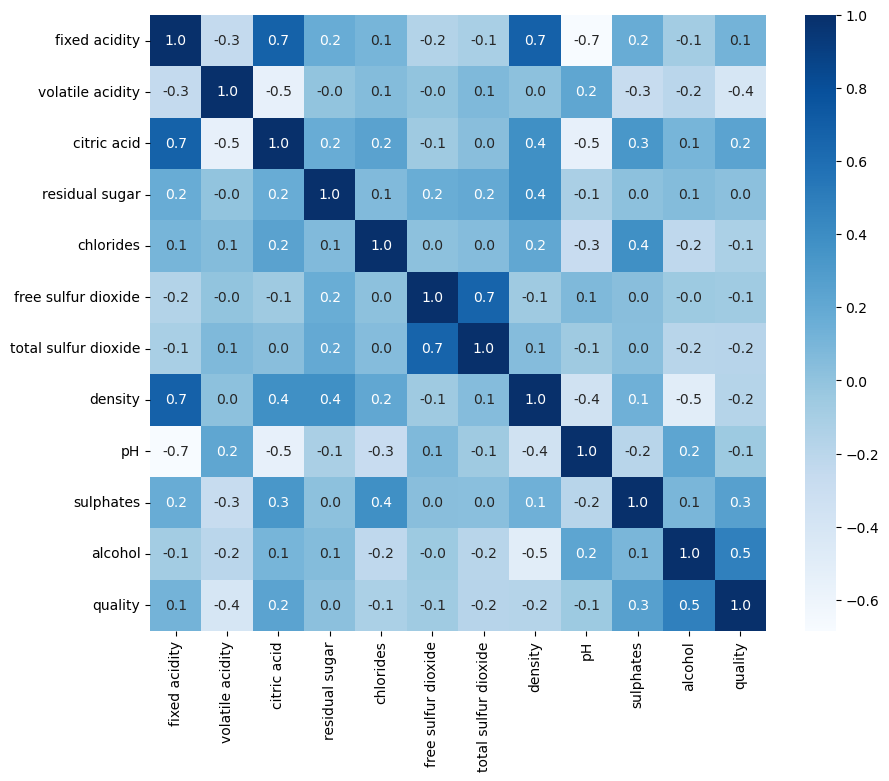

In [102]:
# Understand the relationships between variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cbar=True, square = True, annot=True, fmt = '.1f', cmap='Blues')
plt.show()

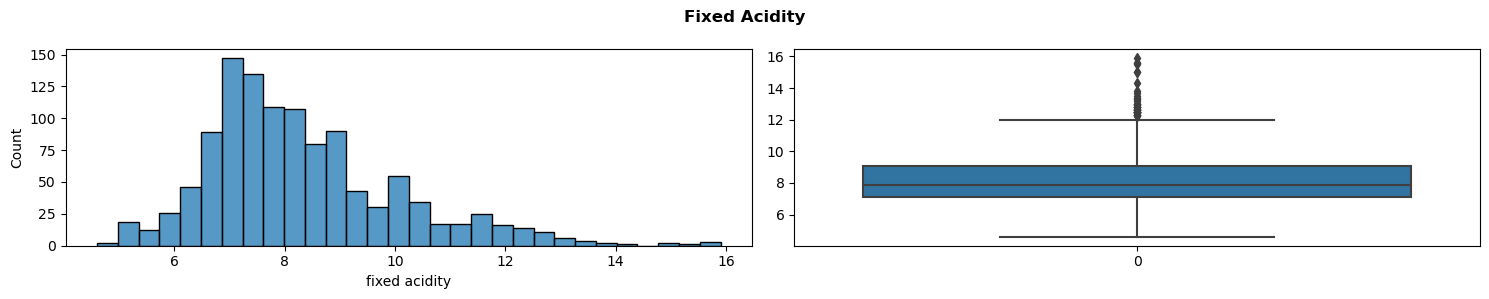

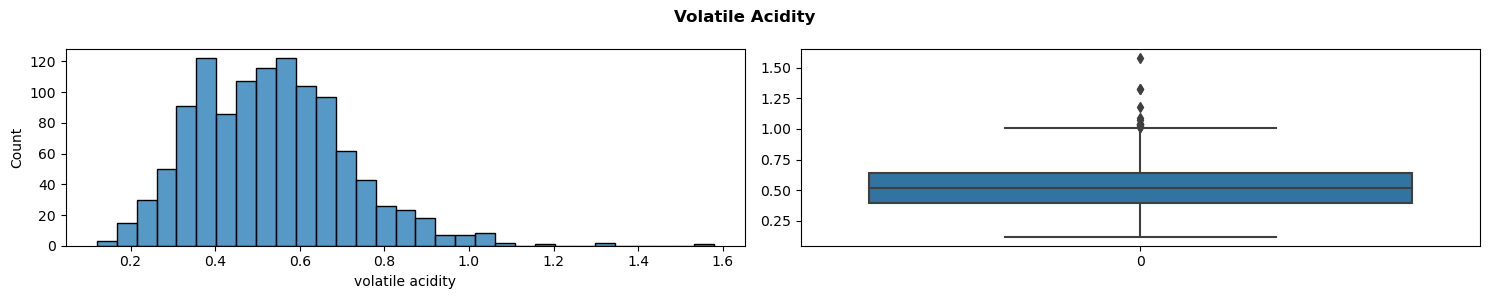

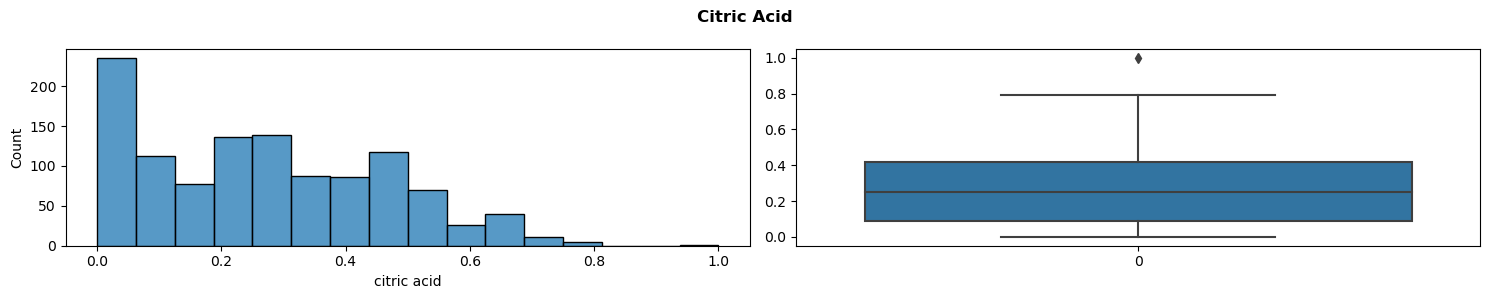

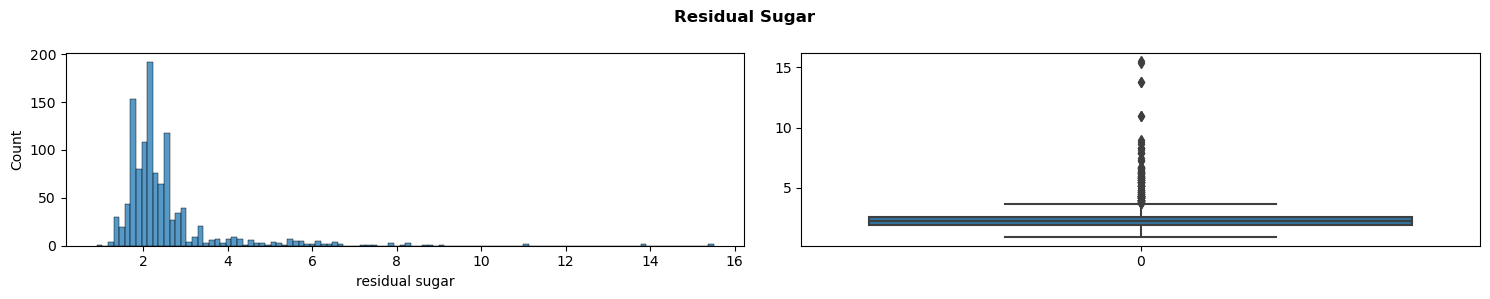

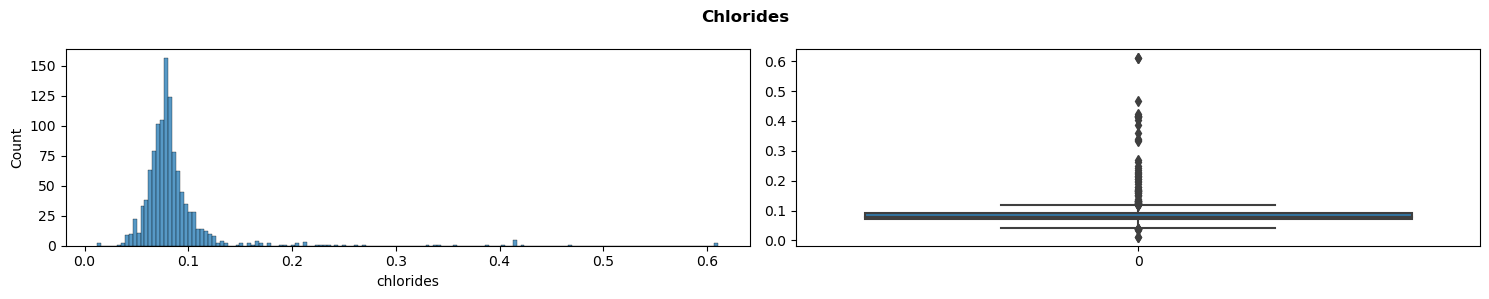

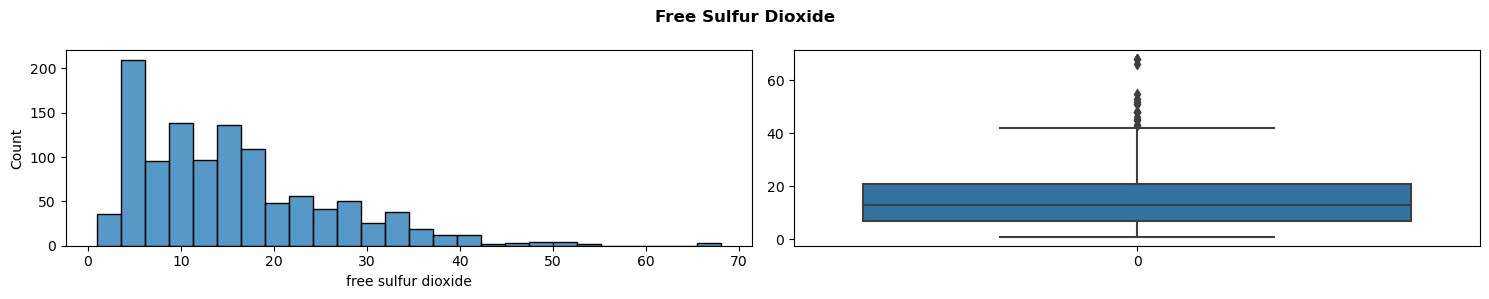

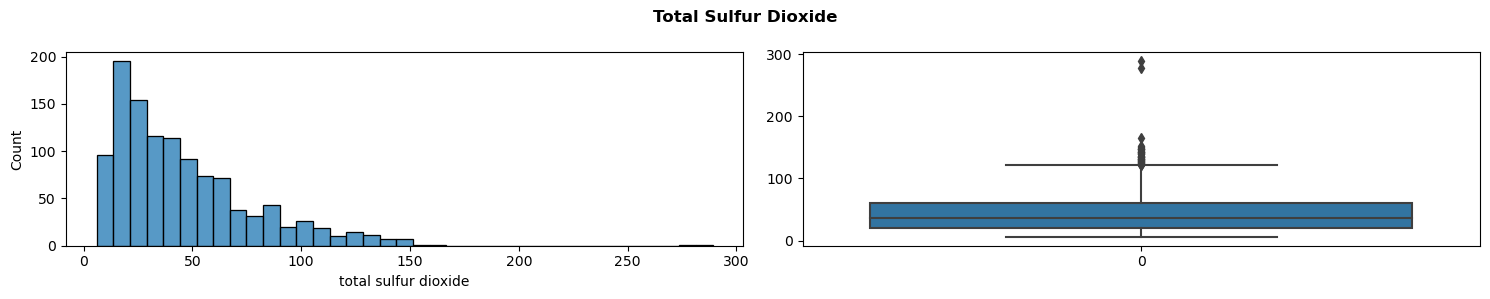

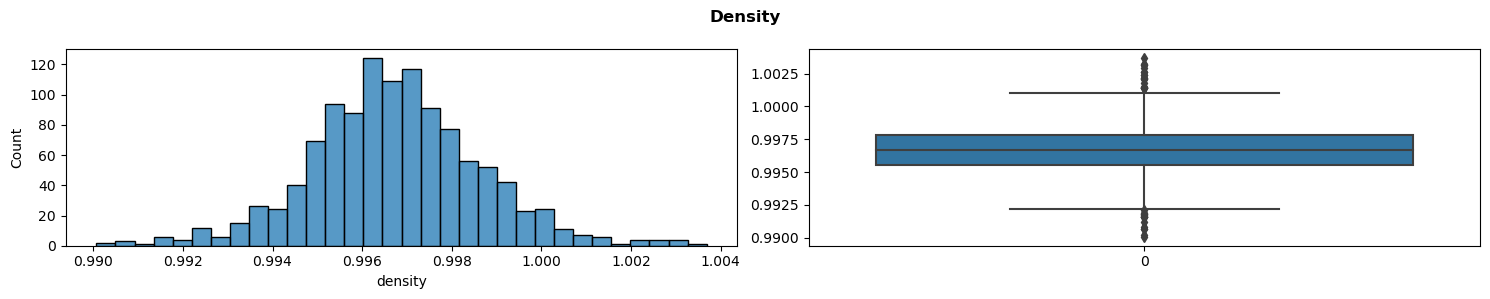

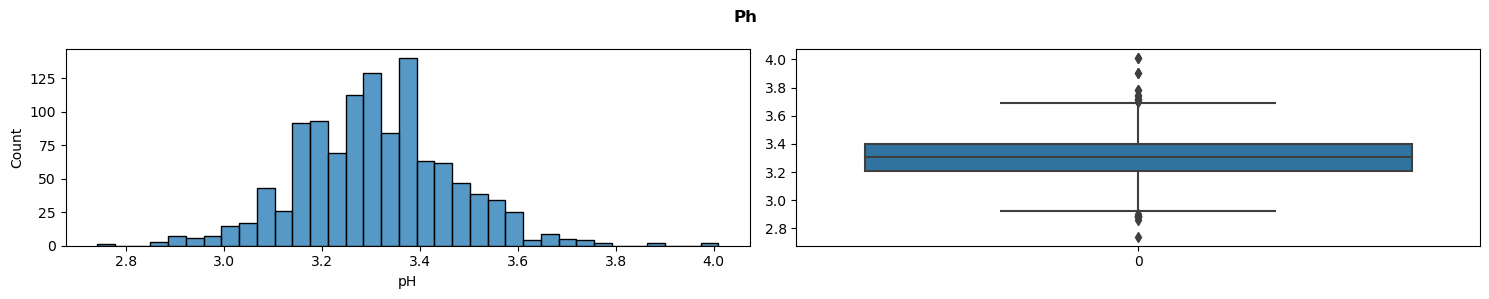

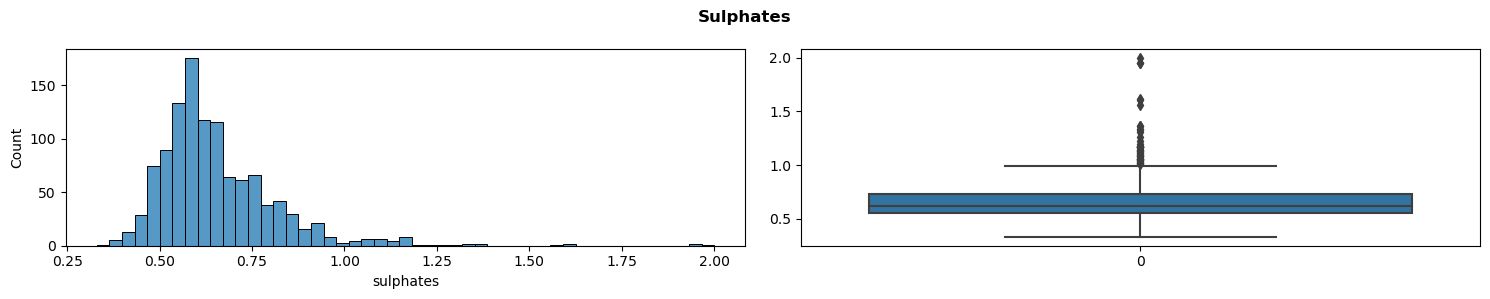

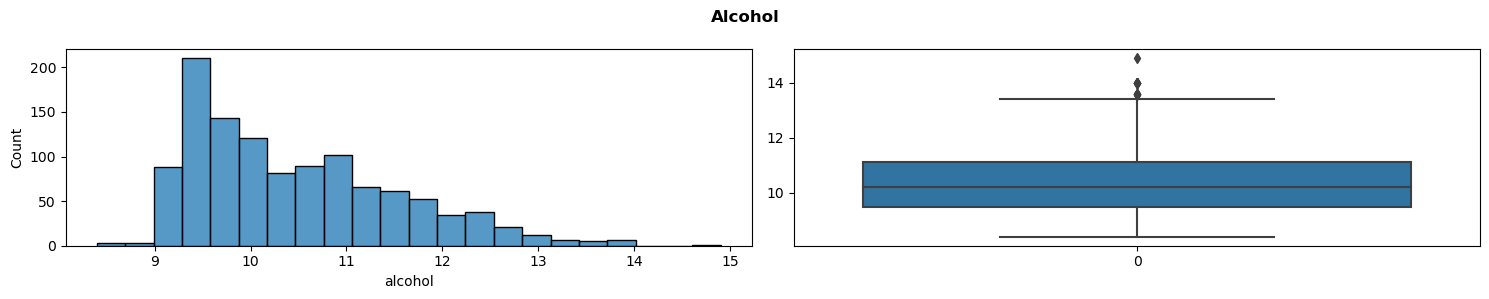

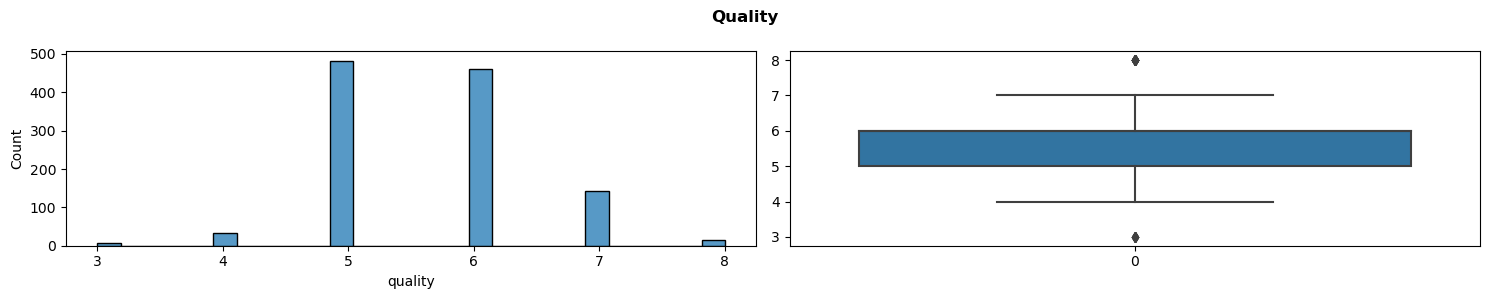

In [103]:
# understanding all the variables using histogram and boxplot

for col in df.columns.to_list():
    fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,3))
    sns.histplot(df[col], ax = ax[0])
    sns.boxplot(df[col], ax = ax[1])
    plt.suptitle(f'{col.title()}',weight='bold')
    plt.tight_layout()

C:\Users\njhar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


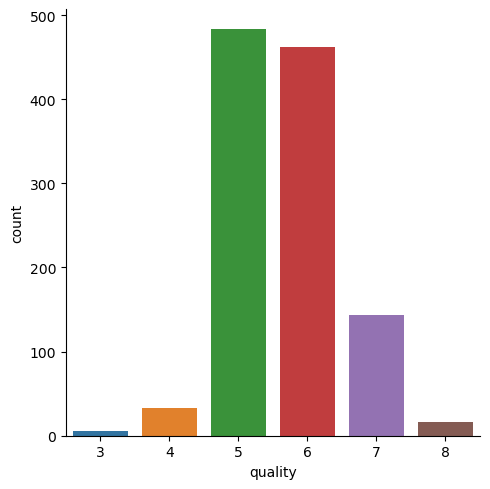

In [104]:
# Quality counts using barchart

sns.catplot(x = 'quality', data = df, kind = 'count')

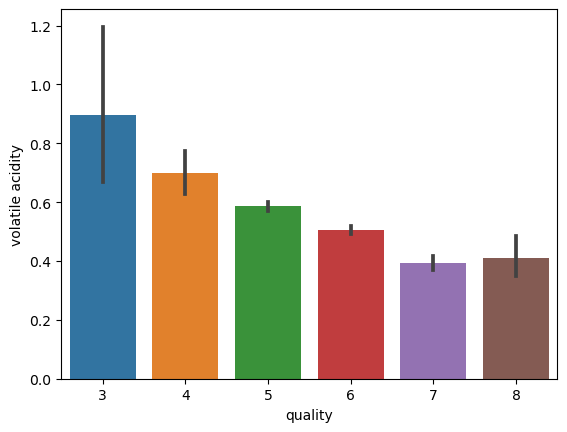

In [105]:
# wine quality checking with volatile acidity

" low 'volatile acidity' contains high quality of wine "

sns.barplot(x = 'quality', y = 'volatile acidity', data = df)
plt.show()

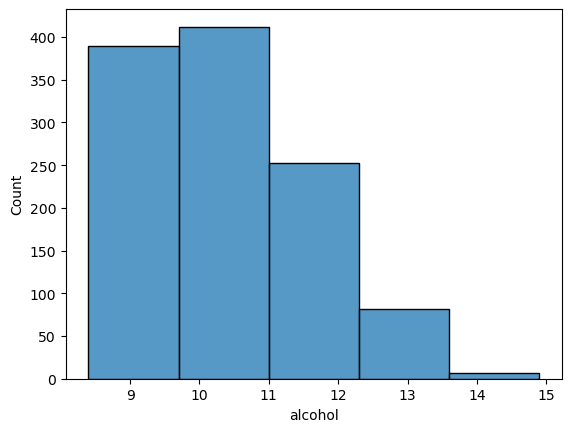

In [106]:
# alcohol level containing in the wine

sns.histplot(df.alcohol, bins=5);

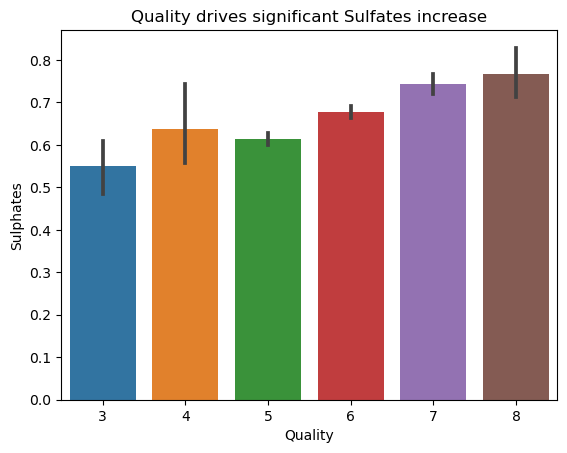

In [107]:
# wine quality checking with sulphates

sns.barplot(x = 'quality', y = 'sulphates', data = df)
plt.xlabel('Quality')
plt.ylabel('Sulphates')
plt.title('Quality drives significant Sulfates increase')
plt.show()

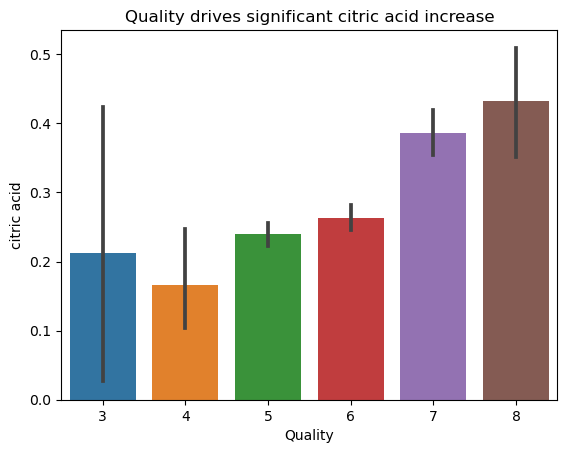

In [108]:
# wine quality checking with citric acid

sns.barplot(x = 'quality', y = 'citric acid', data = df)
plt.xlabel('Quality')
plt.ylabel('citric acid')
plt.title('Quality drives significant citric acid increase')
plt.show()

In [109]:
# Detecting outliers using the Z-score test
" z > 3 (Thershold) ---- this is an outlier"
z = np.abs(stats.zscore(df))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.521580          0.939332     1.365027        0.466421   0.231395   
1          0.292593          1.941813     1.365027        0.050060   0.234247   
2          0.292593          1.273492     1.161568        0.171289   0.107253   
3          1.653789          1.399789     1.483400        0.466421   0.252560   
4          0.521580          0.939332     1.365027        0.466421   0.231395   
...             ...               ...          ...             ...        ...   
1138       1.151292          0.118842     0.703785        0.171289   0.231395   
1139       0.865059          0.493785     0.958109        0.466421   0.400719   
1140       1.208538          0.382399     0.958109        0.392638   0.064922   
1141       1.380278          0.103932     0.856379        0.245072   0.527712   
1142       1.380278          0.633019     0.754650        0.392638   0.252560   

      free sulfur dioxide  

In [110]:
# printing the outliers values

print(np.where(z>3)) 

(array([  11,   13,   30,   31,   32,   59,   61,   64,   75,   75,   87,
         88,   96,   98,  103,  103,  103,  103,  114,  115,  129,  142,
        161,  161,  167,  170,  171,  182,  182,  200,  230,  231,  240,
        244,  249,  272,  275,  275,  278,  278,  287,  289,  311,  311,
        324,  329,  339,  339,  348,  366,  368,  388,  397,  397,  399,
        399,  407,  419,  421,  424,  430,  452,  453,  454,  460,  460,
        462,  462,  462,  485,  490,  490,  493,  514,  520,  538,  557,
        572,  589,  597,  598,  627,  627,  644,  648,  654,  655,  690,
        714,  738,  738,  756,  760,  760,  761,  761,  787,  831,  871,
        890,  898,  898,  914,  915,  919,  922,  922,  931,  933,  934,
        934,  935,  965,  971,  973,  973,  975,  975, 1022, 1022, 1022,
       1046, 1051, 1051, 1053, 1053, 1055, 1066, 1074, 1111, 1111, 1111,
       1122], dtype=int64), array([ 9,  4,  4,  9,  8,  9,  9,  9,  4,  9,  1,  1, 10, 10,  2,  4,  8,
        9,  3,  3,  

In [111]:
# Removing the outlier values


new_df = df[(z < 3).all(axis = 1)] # creating dataset without outliers

In [112]:
# new dataset without outliers
new_df.shape

(1041, 12)

In [113]:
# old data with outliers
df.shape

(1143, 12)

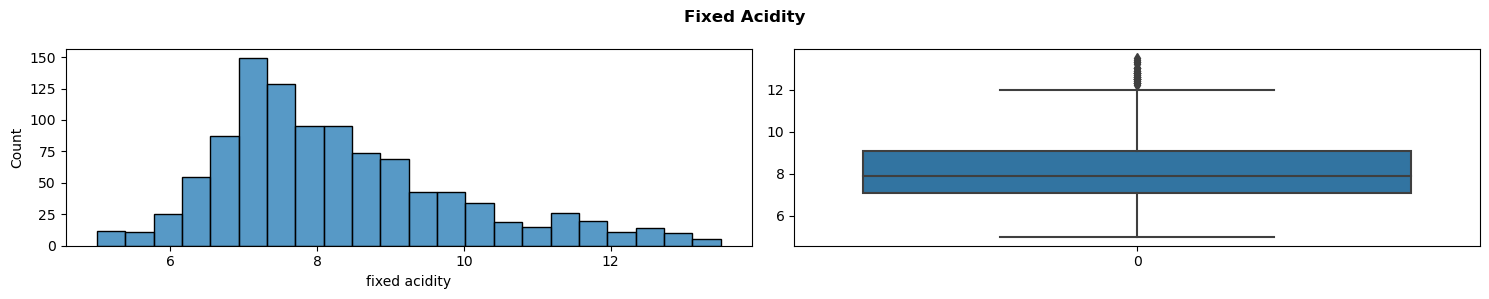

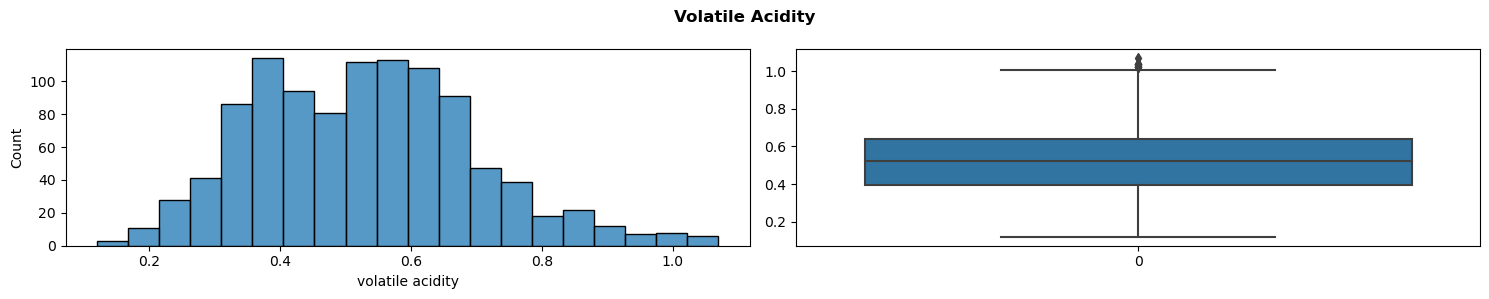

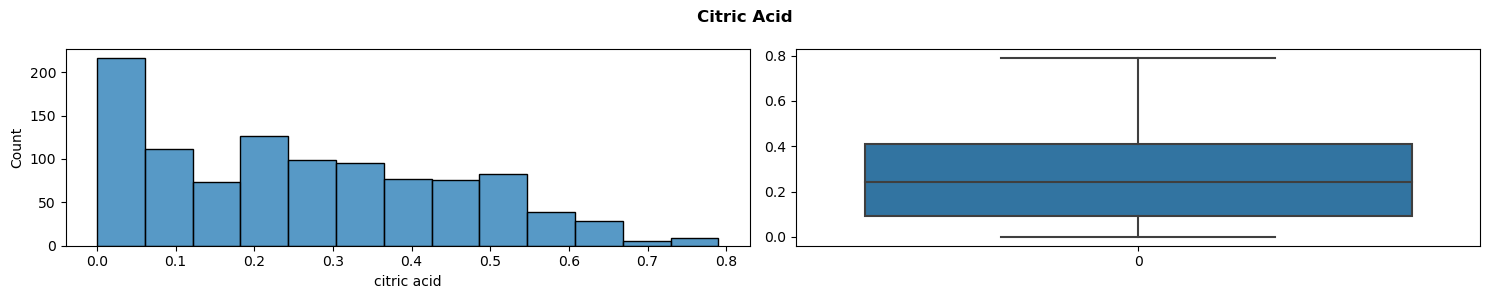

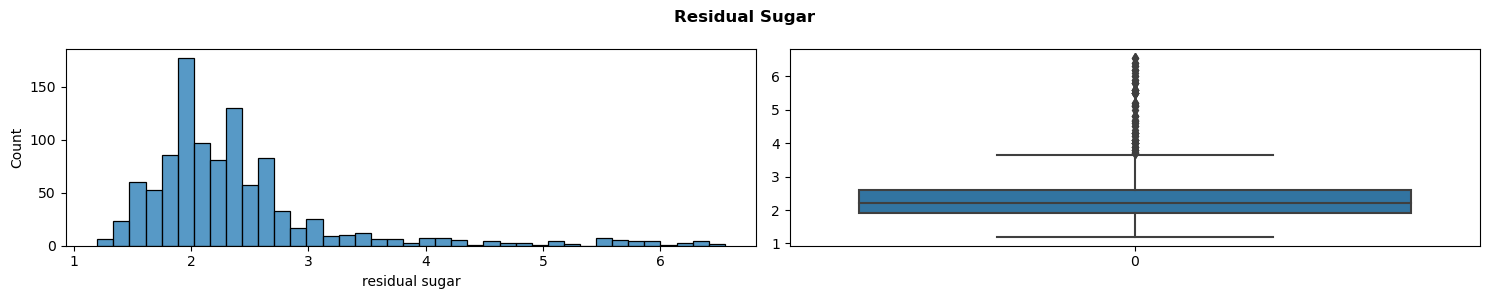

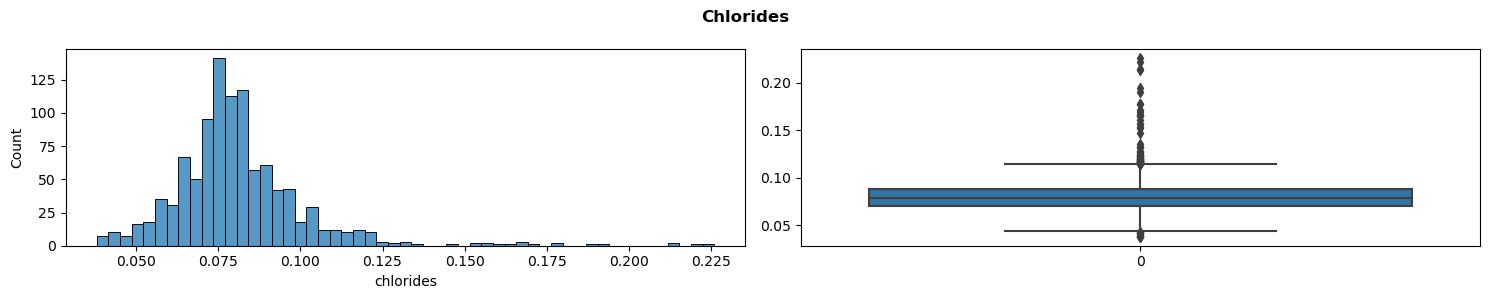

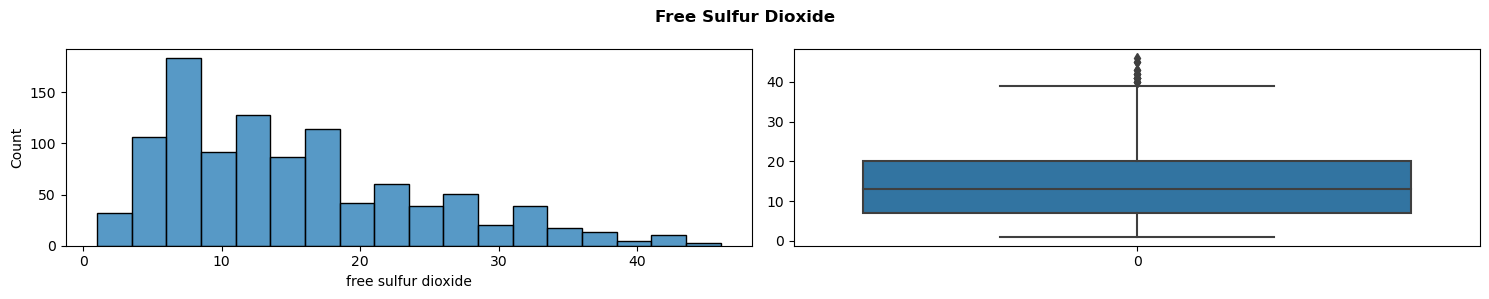

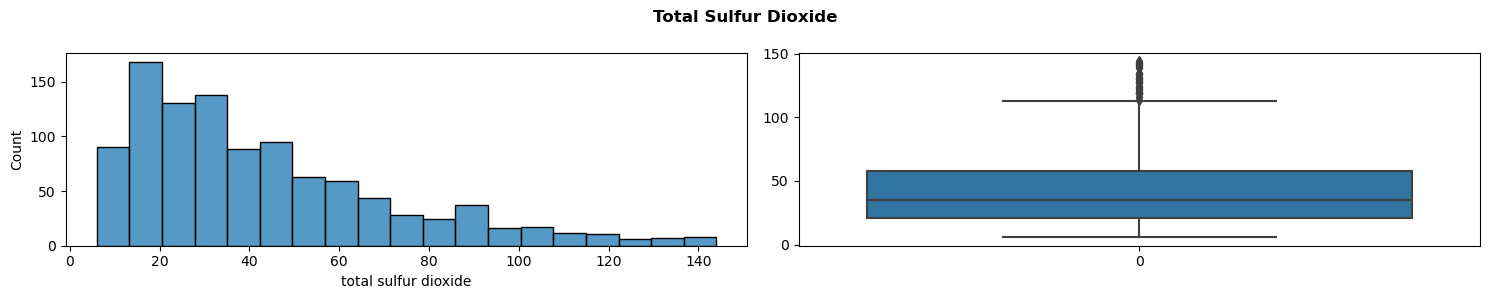

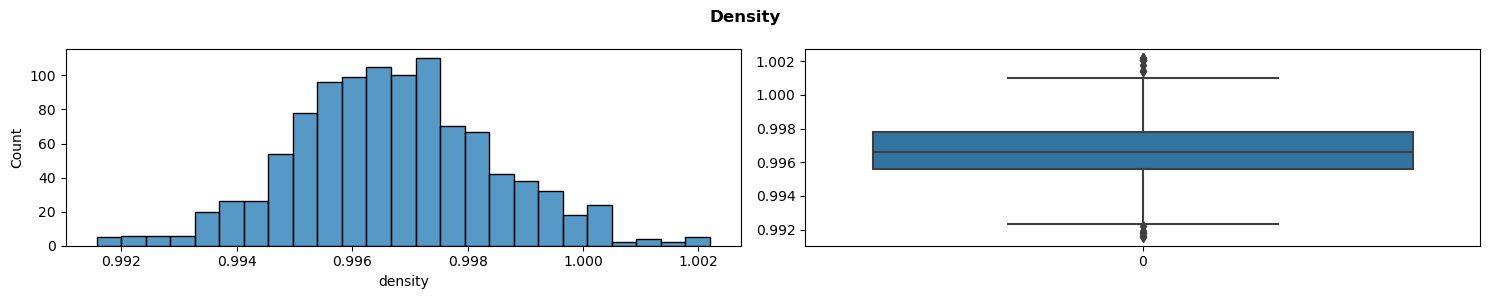

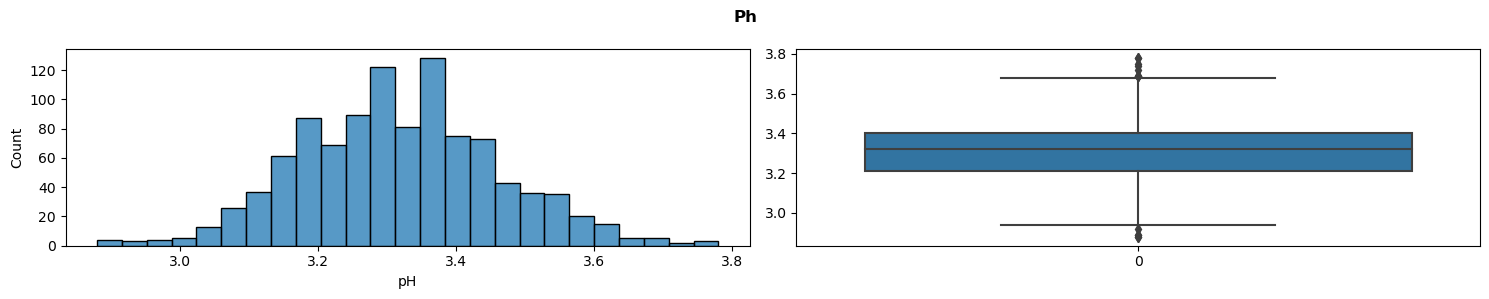

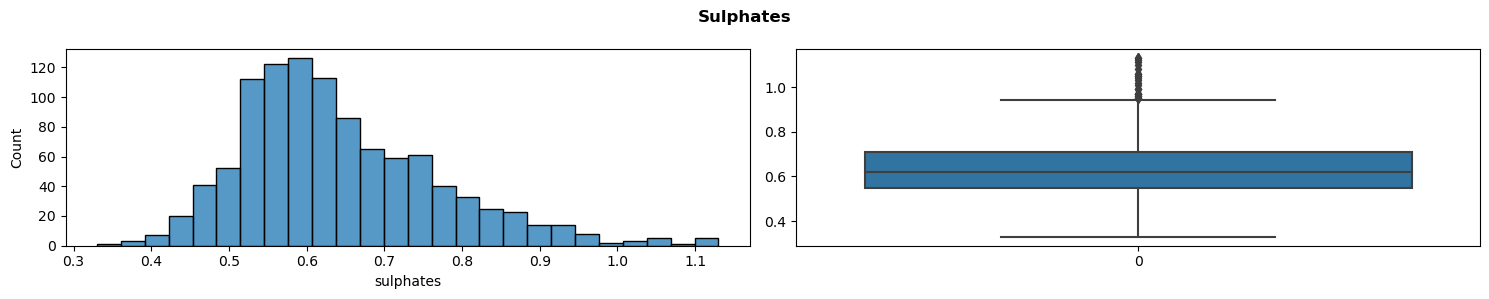

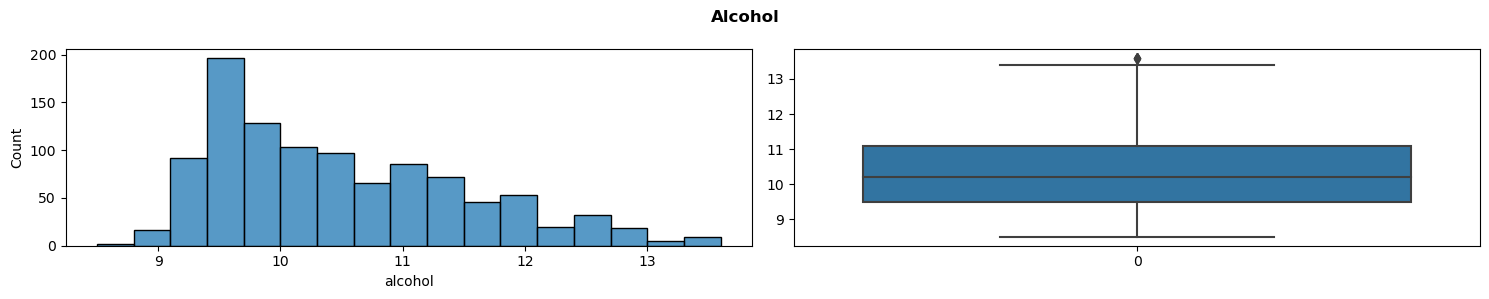

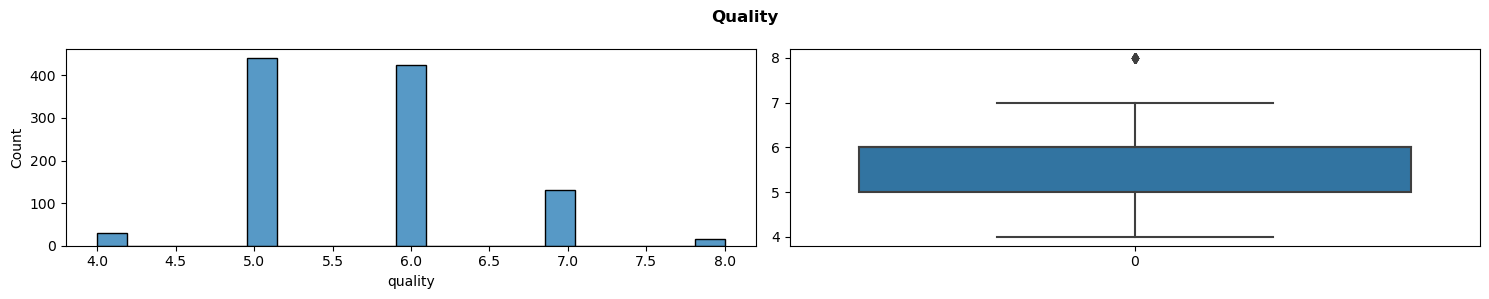

In [114]:
# understanding variables with new data (without outliers)

for col in df.columns.to_list():
    fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,3))
    sns.histplot(new_df[col], ax = ax[0])
    sns.boxplot(new_df[col], ax = ax[1])
    plt.suptitle(f'{col.title()}',weight='bold')
    plt.tight_layout()

In [115]:
# Quality counts
new_df['quality'].value_counts()

quality
5    440
6    425
7    131
4     30
8     15
Name: count, dtype: int64

In [116]:
from imblearn.over_sampling import SMOTE

In [117]:
# Creating an instance for SMOTE
oversample = SMOTE(random_state=42)

In [118]:
X = new_df.drop(columns='quality')
y = new_df['quality']

In [119]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns before oversampling')
print(f'y has {y.shape[0]} rows before oversampling')

X has 1041 rows and 11 columns before oversampling
y has 1041 rows before oversampling


In [120]:
X, y = oversample.fit_resample(X,y)

In [121]:
y.value_counts()

quality
5    440
6    440
7    440
4    440
8    440
Name: count, dtype: int64

In [122]:
 # assigning the X and y values for train and test data spliting for the various ML models
    
X = new_df.drop(columns='quality')
y = new_df['quality']

In [123]:
# Train and Test data spliting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [124]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(832, 11)
(209, 11)
(832,)
(209,)


In [125]:
# scaling the data using MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
# Model Implimentation

In [127]:
# RandomForestClassification 

rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
y_pred = rfc.predict(X_test)
print("Random Forest accuracy score: ",accuracy_score(y_test, y_pred))

Random Forest accuracy score:  0.6698564593301436


In [128]:
# Confusion Matrix

cmx=confusion_matrix(y_test,y_pred) 
print("\n Confustion Matrix : \n",cmx)


 Confustion Matrix : 
 [[ 0  4  1  0  0]
 [ 0 62 19  1  0]
 [ 0 21 56  5  0]
 [ 0  4 11 22  0]
 [ 0  0  3  0  0]]


<Axes: >

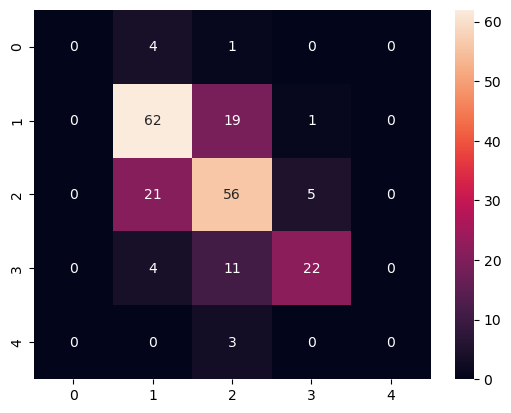

In [129]:
# plotting the confusion matrix

sns.heatmap(cmx, annot = True)

In [130]:
# Classification report

classify_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n",classify_report)


Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.68      0.76      0.72        82
           6       0.62      0.68      0.65        82
           7       0.79      0.59      0.68        37
           8       0.00      0.00      0.00         3

    accuracy                           0.67       209
   macro avg       0.42      0.41      0.41       209
weighted avg       0.65      0.67      0.66       209



C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


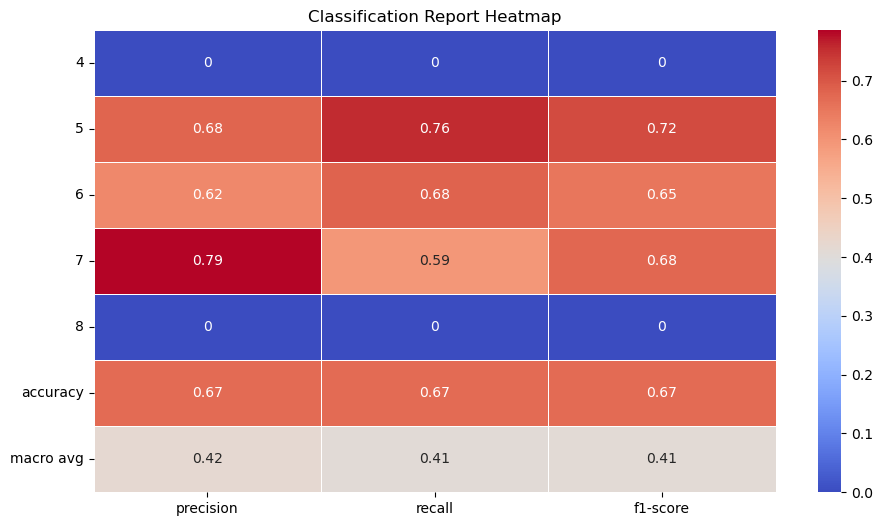

In [131]:
# Classification report for plotting

classify_report = classification_report(y_test, y_pred, output_dict=True)
# classification report in Data Frame

report_df = pd.DataFrame(classify_report).transpose()
# plotting 

plt.figure(figsize=(11, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Classification Report Heatmap')
plt.show()

In [136]:
# Support vector classifier model

In [137]:
from sklearn.svm import SVC

In [138]:
svc = SVC() 
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
y_pred = svc.predict(X_test)
print("Support vector classifier accuracy score: ",accuracy_score(y_test, y_pred))

Support vector classifier accuracy score:  0.6028708133971292


In [139]:
# Confusion Matrix

cmx=confusion_matrix(y_test,y_pred) 
print("\n Confustion Matrix : \n",cmx)


 Confustion Matrix : 
 [[ 0  4  1  0  0]
 [ 0 57 25  0  0]
 [ 0 23 54  5  0]
 [ 0  2 20 15  0]
 [ 0  0  2  1  0]]


<Axes: >

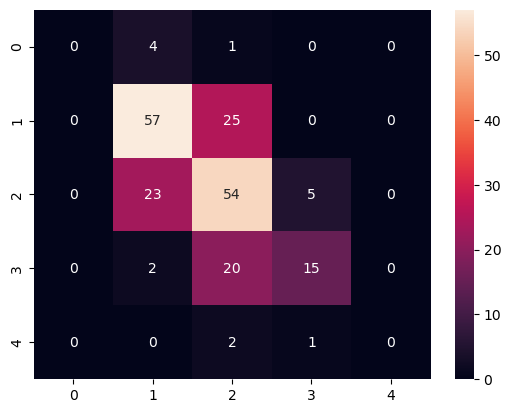

In [140]:
# plotting the confusion matrix

sns.heatmap(cmx, annot = True)

In [141]:
# Classification report

classify_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n",classify_report)


Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.66      0.70      0.68        82
           6       0.53      0.66      0.59        82
           7       0.71      0.41      0.52        37
           8       0.00      0.00      0.00         3

    accuracy                           0.60       209
   macro avg       0.38      0.35      0.36       209
weighted avg       0.59      0.60      0.59       209



C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


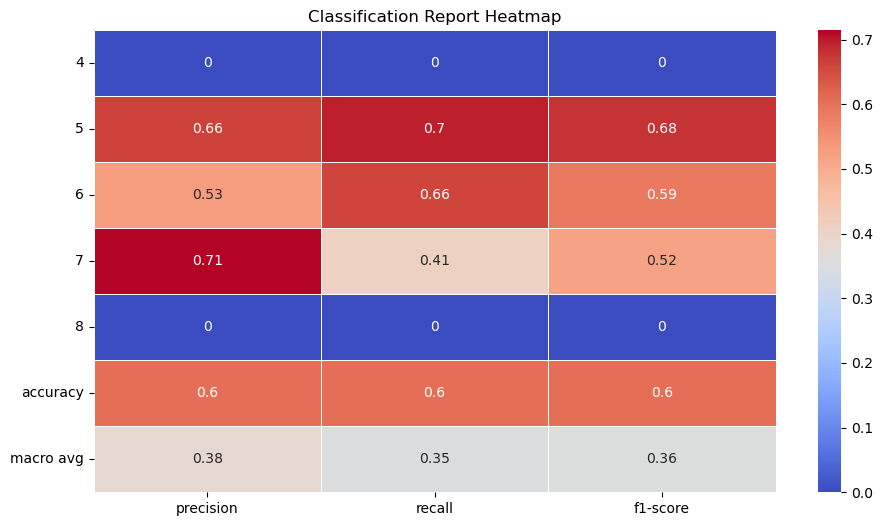

In [142]:
# Classification report for plotting

classify_report = classification_report(y_test, y_pred, output_dict=True)
# classification report in Data Frame

report_df = pd.DataFrame(classify_report).transpose()
# plotting 

plt.figure(figsize=(11, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Classification Report Heatmap')
plt.show()

In [144]:
# prediction

In [145]:
# Label Binarization

In [146]:
y = new_df['quality'].apply(lambda y_value: 1 if y_value >=7 else 0)

In [147]:
# prediction
input_data = (11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8)

#changing input data into numpy array
input_change = np.asarray(input_data)

#reshaping the data
re_shape = input_change.reshape(1, -1)

# final prediction

predict = rfc.predict(re_shape)
print(predict)

if predict == 1:
    print("Good quality wine")
else:
    print("Bad quality wine")

[5]
Bad quality wine
